In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

# K-means
- iris 데이터 활용 

In [3]:
# 시각화를 위한 PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x)
x_reduced = pca.transform(x)

In [4]:
data = np.hstack((x_reduced, y.reshape(-1, 1)))

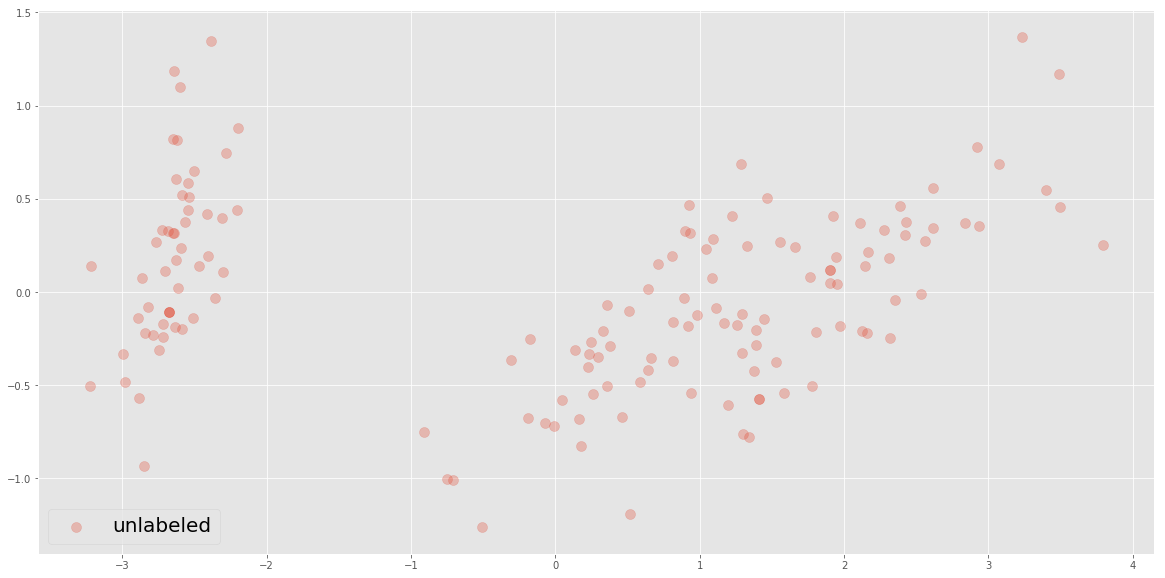

In [5]:
plt.figure(figsize = (20, 10))
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], marker='o', s = 100, alpha = 0.3, label = 'unlabeled')
plt.legend(fontsize = 20)

## 1. K - means 클래스

In [6]:
class KMeans:
    def __init__(self, k):
        self.k = k ## 군집의 개수
        self.means = None ## 군집의 중심
        self.assignments = None ## 군집
        
    def distance(self, u, v):
        from scipy import spatial
        return spatial.distance.euclidean(u, v)
    
    def classify(self, input):
        return min(range(self.k), key=lambda i  : self.distance(input, self.means[i]))  ## 각 데이터들을 중심점과 계산하여 가장 가까운 중심점으로 선택
    
    def train(self, inputs):
        """임의의 k개의 초기점 설정"""
        import numpy as np
        import random
        self.means = random.sample(inputs.tolist(), self.k) ## 임의의 k개의 초기점 설정
        
        while True:
            new_assignments = list(map(self.classify, inputs))
            
            ### 소속되는 군집이 바뀌지 않았다면 종료 ### True가 되면 while 종료
            if self.assignments == new_assignments:
                return
            # 아니라면 새로운 군집 찾기
            self.assignments = new_assignments
            
            # 수정된 군집의 새로운 중심점 계산
            for i in range(self.k):
                i_points = [p for p, a in zip(inputs, self.assignments) if a == i]
                
                # 중심점 이동 (means)
                if i_points:
                    self.means[i] = np.mean(i_points, axis=0)

In [7]:
import random
random.seed(0)
clustering = KMeans(3)  ## 실제 iris 그룹 개수
clustering.train(x_reduced)

In [8]:
cluster_center = np.array(clustering.means)
data_cluster = np.array(clustering.assignments)

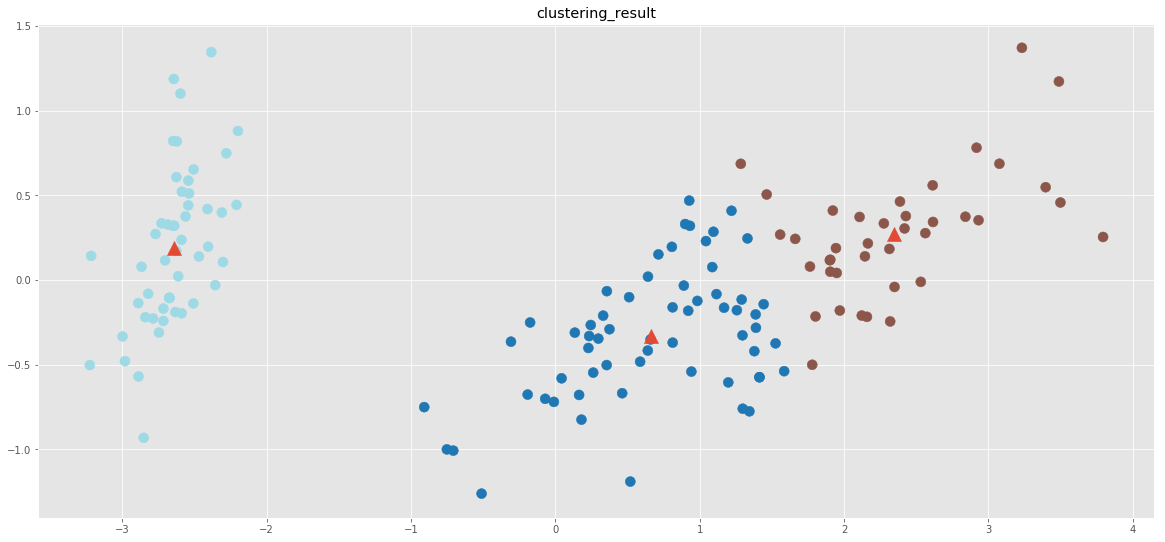

In [9]:
plt.figure(figsize = (20, 20))
ax = plt.subplot(211)
plt.title('clustering_result')
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], marker='o', s = 100, c=data_cluster, cmap='tab20')
plt.scatter(cluster_center[:, 0], cluster_center[:, 1], marker='^', s = 200)
# ax = plt.subplot(212)
# plt.title('real_group')
# plt.scatter(x_reduced[:, 0], x_reduced[:, 1], marker='o', s = 100, c=y, cmap='tab20')


## 2. 최적 k 선택
- 앞에서는 사전지식을 가지고 k를 선택하였지만, 그렇지않은 경우에는 최적의 k를 다른 기준에 의해 판단해야된다.
- 여러 k 값에 대한 중심점과 각 데이터 포인트 사이의 거리의 제곱합을 그래프로 그리고, 그 그래프가 어디서 꺾이는지 관찰한다.

In [10]:
def squared_clustering_errors(inputs, k):
    from scipy.spatial import distance
    import numpy as np
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = np.array(clusterer.means)
    assignments = np.array(clusterer.assignments)

    return sum(distance.euclidean(input, means[cluster])
               for input, cluster in zip(inputs, assignments))

In [11]:
def plot_squared_clustering_errors(inputs):
    ks = range(1, 10)
    errors = [squared_clustering_errors(inputs, k) for k in ks]
    plt.figure(figsize = (10, 5))
    plt.plot(ks, errors)
    plt.xticks(ks)
    plt.xlabel("k")
    plt.ylabel("total squared error")
    plt.show()

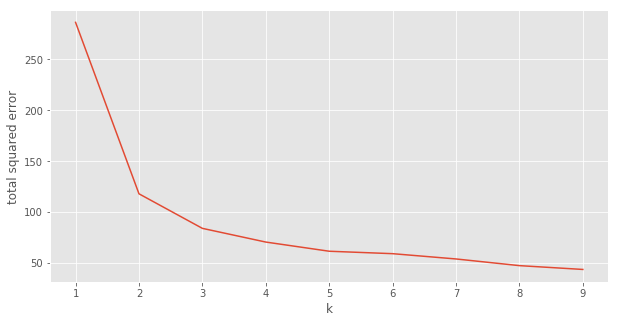

In [12]:
plot_squared_clustering_errors(x_reduced)

> ## 2 ~ 3개의 군집이 가장 적합해보이며, 결정은 분석가의 판단에 따른다.
-  모든 k에 대해 계산이 어려울 정도로 큰 데이터를 다룰때에는 분석가의 판단이 더욱 중요해진다.


http://scikit-learn.org/stable/modules/clustering.html#clustering
- 다양한 클러스터링 방법들이 있으니, 데이터의 분포를 확인하고 적합한 클러스터링 방법론을 활용한다.

## 3. sklearn

In [14]:
from sklearn.cluster import KMeans

In [15]:
clustering = KMeans(n_clusters=3).fit(x_reduced)

In [16]:
# 각 클러스터의 중심점

clustering.cluster_centers_

array([[-2.64084076,  0.19051995],
       [ 2.34645113,  0.27235455],
       [ 0.66443351, -0.33029221]])

In [17]:
# 각 데이터의 클러스터 번호
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

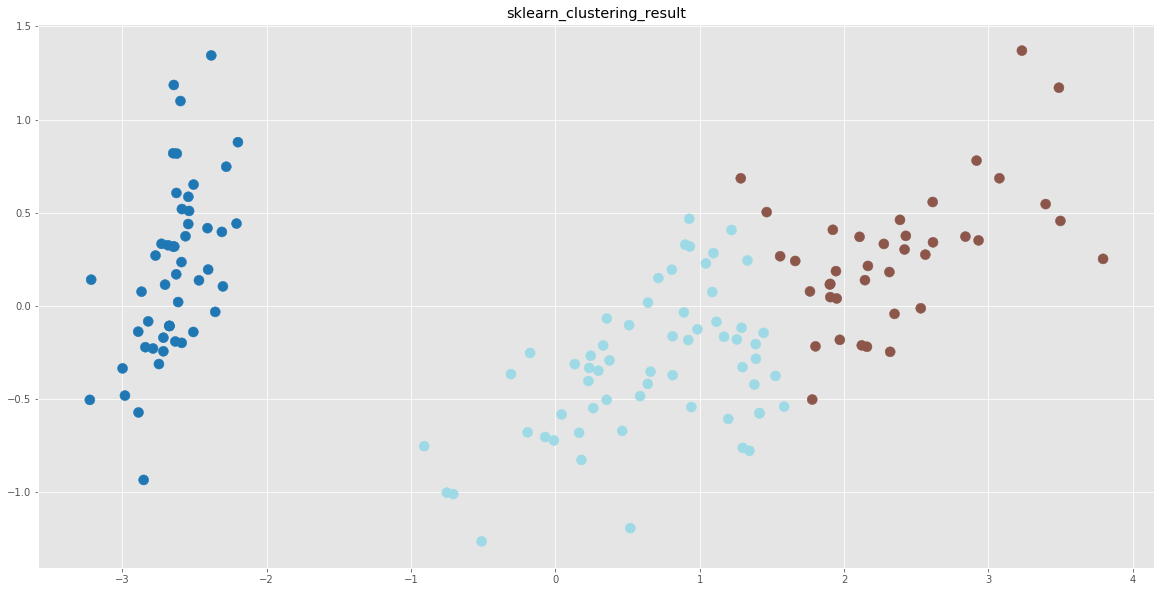

In [18]:
plt.figure(figsize = (20, 10))
plt.title('sklearn_clustering_result')
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], marker='o', s = 100, c=clustering.labels_, cmap='tab20')

# 군집 결과 해석
- 각 군집의 중심점 주변 데이터를 가지고 군집의 특성을 살펴본다.

## 1. 각 데이터와 각 군집 간의 거리를 계산한다.

In [30]:
# fit_transform 메서드 활용

cluster_distance_array = clustering.fit_transform(x_reduced)

cluster_distance_df = pd.DataFrame(cluster_distance_array, 
                     columns = ['from_cluster1_centroid', 'from_cluster2_centroid', 'from_cluster3_centroid'])


In [33]:
cluster_distance_df.head()

,from_cluster1_centroid,from_cluster2_centroid,from_cluster3_centroid
0,5.030951,0.142830,3.412464
1,5.081095,0.367713,3.383644
2,5.252274,0.411687,3.559486
3,5.126203,0.512638,3.410925
4,5.075418,0.168123,3.457429


## 2. 중심점과 가까운 데이터 n개를 선택한다.

In [46]:
x_df = pd.DataFrame(x, columns = ['꽃받침 길이', '꽃받침 너비', '꽃잎 길이', '꽃잎 너비'])

In [51]:
# 첫 번째 군집

cluster_1_centroid_data = x_df.iloc[cluster_distance_df.sort_values('from_cluster1_centroid')[:5].index, :]

In [52]:
# 두 번째 군집
cluster_2_centroid_data = x_df.iloc[cluster_distance_df.sort_values('from_cluster2_centroid')[:5].index]

In [53]:
# 세 번째 군집
cluster_3_centroid_data = x_df.iloc[cluster_distance_df.sort_values('from_cluster3_centroid')[:5].index]

## 3. feature 특징을 살펴보며, 군집의 특징을 정의한다.

In [57]:
x_df.describe()

,꽃받침 길이,꽃받침 너비,꽃잎 길이,꽃잎 너비
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
cluster_1_centroid_data.describe()

,꽃받침 길이,꽃받침 너비,꽃잎 길이,꽃잎 너비
count,5.000000,5.000000,5.000000,5.000000
mean,6.760000,3.180000,5.640000,2.280000
std,0.089443,0.130384,0.089443,0.178885
min,6.700000,3.000000,5.500000,2.100000
25%,6.700000,3.100000,5.600000,2.100000
50%,6.700000,3.200000,5.700000,2.300000
75%,6.800000,3.300000,5.700000,2.400000
max,6.900000,3.300000,5.700000,2.500000


> ###  첫번째 군집 : 꽃받침 길이/너비, 꽃잎 길이/너비 모두 평균보다 길고 넓은 붓꽃 군집

In [55]:
cluster_2_centroid_data.describe()

,꽃받침 길이,꽃받침 너비,꽃잎 길이,꽃잎 너비
count,5.000000,5.000000,5.000000,5.000000
mean,5.080000,3.400000,1.440000,0.220000
std,0.083666,0.070711,0.054772,0.044721
min,5.000000,3.300000,1.400000,0.200000
25%,5.000000,3.400000,1.400000,0.200000
50%,5.100000,3.400000,1.400000,0.200000
75%,5.100000,3.400000,1.500000,0.200000
max,5.200000,3.500000,1.500000,0.300000


> ### 두번째 군집 : 꽃받침 길이/너비는 평균과 비슷하고, 꽃잎 길이/너비는 평균보다 짧고 좁은 붓꽃 군집

In [56]:
cluster_3_centroid_data.describe()

,꽃받침 길이,꽃받침 너비,꽃잎 길이,꽃잎 너비
count,5.000000,5.000000,5.000000,5.000000
mean,5.800000,2.800000,4.480000,1.420000
std,0.353553,0.291548,0.044721,0.109545
min,5.400000,2.300000,4.400000,1.300000
25%,5.600000,2.800000,4.500000,1.300000
50%,5.700000,2.900000,4.500000,1.500000
75%,6.000000,3.000000,4.500000,1.500000
max,6.300000,3.000000,4.500000,1.500000


> ### 세번째 군집 : 꽃받침 길이는 평균과 비슷하고 너비는 평균보다 좁은 붓꽃 군집